In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import deepchem as dc
from deepchem.models import GraphConvModel
from rdkit import Chem
from sklearn.model_selection import train_test_split

from preprocessing import PreProcessor
from config import PATH_RESULTS, PATH_RESULTS_EDA_CORR,\
    PATH_RESULTS_EDA_DIST


C:\Users\kacpe\Miniconda3\envs\deepchem\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kacpe\Miniconda3\envs\deepchem\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kacpe\Miniconda3\envs\deepchem\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kacpe\Miniconda3\envs\deepchem\lib\site-packages\ten

In [2]:
delaney_tasks, delaney_dataset, delaney_transformers = dc.molnet.load_delaney(featurizer='GraphConv')
delaney_train, delaney_valid, delaney_test = delaney_dataset

Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.


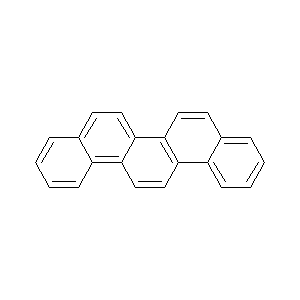

In [26]:
train_mols = [Chem.MolFromSmiles(compounds)
                for compounds in delaney_train.ids]
print(train_mols[0])
Chem.Draw.MolToImage(train_mols[3])

In [8]:
model = GraphConvModel(
    len(delaney_tasks),
    batch_size=50,
    mode='regression',
    tensorboard=True,
    model_dir="../tensorboard_logs",
    verbose=1
)
model.fit(delaney_train, nb_epoch=5)

C:\Users\kacpe\Miniconda3\envs\deepchem\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\kacpe\Miniconda3\envs\deepchem\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\kacpe\Miniconda3\envs\deepchem\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.48272294299677015